## Continous Assessment IV - Data Visualisation module

# Data Viz for specific age groups (Young adults & Seniours)
## Final Assessment

### **Lecturer**: David McQuaid  

**Student name**: Lais Carvalho | **student ID**: 2019435 | **email**: santanal@tcd.ie

**Date:** January / 2020

## Notebook's Overview

This Jupyter Notebook contains the visualisations for the Continuous Assessment IV worth 40% of the final grade for Year 4 of the module Data Visualisation and Communication in the course of Computing and Information Technology at CCT College Dublin.

The document is divided into 3 parts:
* **[Part I](#Part-I)** describes the overall plan for the data exploration and explains preliminary findings (500 words).
* **[Part II](#Part-II)** contains visualisations for the **young adults**, i.e. people in the age group between 17 and 35 years of age where it is ideal that visualisation's goals are clearly set, all is quick and easy to access and understand.
* And **[Part III](#Part-III)**, which contains the visualisations focusing on elderly individuals, a.k.a the **Seniours** group, with individuals older than 60 years. Here, the plots should be straigtforward enough as to not assume previous knowledge by the audience in order to be understood, use bigger fontsizes (nothing smaller than 16px), abuse of pastel-tons on the colour-scheme (vivid colours can be a burden), avoid use of blue and provide obvious visual aids (to assist on faster understanding). 

> ## Project dependencies (Python virtual environment)
> All requirements to build a working virtual environment for this iPython Notebook are as follows (using `pip` or `conda`):
> * For **pip**: on terminal, create a new virtual env at the project root folder level type and install package dependencies with `pip install -r requirements.txt`.
> * Using **conda**: create a new virtual env with the required dependencies by typing `conda create --name <env_name> --file requirements.txt`. Then, activate it using `conda activate <env_name>`.

> ### Troubleshooting:
>In case the virtual env's name does not show as an option on the Kernel list for the Jupyter Notebook, the user will have to install the Kernel using the CLI command `ipython kernel install --user --name=<env_name>`. 

## Part I
### Data exploration
This section loads the data and describes the steps taken before the visualisations construction.

In [1]:
import pandas as pd # for data exploration and wrangling
import seaborn as sns #for summary on data profiling
import missingno as msno #visualy detects missing data on the dataset
import altair as alt #useful for interactive plots
import matplotlib.pyplot as plt

In [2]:
dfraw = pd.read_csv('./data/consolidated_coin_data.csv') #load the raw dataset

In [3]:
dfraw.info() #quick overview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Currency    28944 non-null  object
 1   Date        28944 non-null  object
 2   Open        28944 non-null  object
 3   High        28944 non-null  object
 4   Low         28944 non-null  object
 5   Close       28944 non-null  object
 6   Volume      28944 non-null  object
 7   Market Cap  28944 non-null  object
dtypes: object(8)
memory usage: 1.8+ MB


In [4]:
dfraw

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,"46,048,752","824,588,509"
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,"41,462,224","853,213,342"
2,tezos,"Dec 02, 2019",1.25,1.26,1.2,1.24,"27,574,097","817,872,179"
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,"24,127,567","828,296,390"
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,"28,706,667","879,181,680"
...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0,"58,287,979"
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.8,0,"65,604,596"
28941,bitcoin-sv,"Apr 30, 2013",4.4,4.57,4.17,4.3,0,"74,020,918"
28942,bitcoin-sv,"Apr 29, 2013",4.37,4.57,4.23,4.38,0,"75,388,964"


All data types are `objects` (strings). The dataset occupies around 2Mb in memory and it is shaped as follows: 28,944 rows by 8 columns. Apparently no missing values.

In [5]:
dfraw.head(7) #check if data is loaded and show the 7 first rows look like

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,"46,048,752","824,588,509"
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,"41,462,224","853,213,342"
2,tezos,"Dec 02, 2019",1.25,1.26,1.2,1.24,"27,574,097","817,872,179"
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,"24,127,567","828,296,390"
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,"28,706,667","879,181,680"
5,tezos,"Nov 29, 2019",1.28,1.34,1.28,1.31,"32,270,224","867,085,098"
6,tezos,"Nov 28, 2019",1.26,1.35,1.22,1.28,"44,240,281","845,073,679"


Since all cells in the dataframe are of `object` datatype (strings),  and it is not possible to perform algebraic operations with such, it will be necessary to convert the columns to:
* `Currency` >>> remains as `object` pandas dtype (Python type `string`)
* `Date` >>> becomes `datetime64` pandas dtype
* `Open`, `High`, `Low`, `Close`, `Volume` and `Market Cap` >>> all become `float64` pandas dtype (Python type `float`)

    To convert the data to `float64` the function `convert_to_float()` below will be used.  (Moffitt, 2018)

In [6]:
dfraw['Date'] = pd.to_datetime(dfraw['Date']) #convert `Date` to datetime64 dtype

In [7]:
def convert_to_float(val):
    """
    Convert the string number value to a float
     - Remove '$'
     - Remove commas
     - Convert to float type
    """
    new_val = val.replace(',','').replace('$', '')
    return float(new_val)

In [8]:
# convert columns to their matching datatypes using function above
dfraw['Open'] = dfraw['Open'].apply(convert_to_float)

dfraw['High'] = dfraw['High'].apply(convert_to_float)

dfraw['Low'] = dfraw['Low'].apply(convert_to_float)

dfraw['Close'] = dfraw['Close'].apply(convert_to_float)

dfraw['Volume'] = dfraw['Volume'].apply(convert_to_float)

dfraw['Market Cap'] = dfraw['Market Cap'].apply(convert_to_float)

In [9]:
dfraw.info() #check if the types are right, according to conversion above

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Currency    28944 non-null  object        
 1   Date        28944 non-null  datetime64[ns]
 2   Open        28944 non-null  float64       
 3   High        28944 non-null  float64       
 4   Low         28944 non-null  float64       
 5   Close       28944 non-null  float64       
 6   Volume      28944 non-null  float64       
 7   Market Cap  28944 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 1.8+ MB


It is possible to see now that all the datatypes have been fixed, which will allow further data exploration.

In [10]:
dfraw['Currency'].unique() #show the different currencies on the dataframe

array(['tezos', 'binance-coin', 'eos', 'bitcoin', 'tether', 'xrp',
       'bitcoin-cash', 'stellar', 'litecoin', 'ethereum', 'cardano',
       'bitcoin-sv'], dtype=object)

<AxesSubplot:>

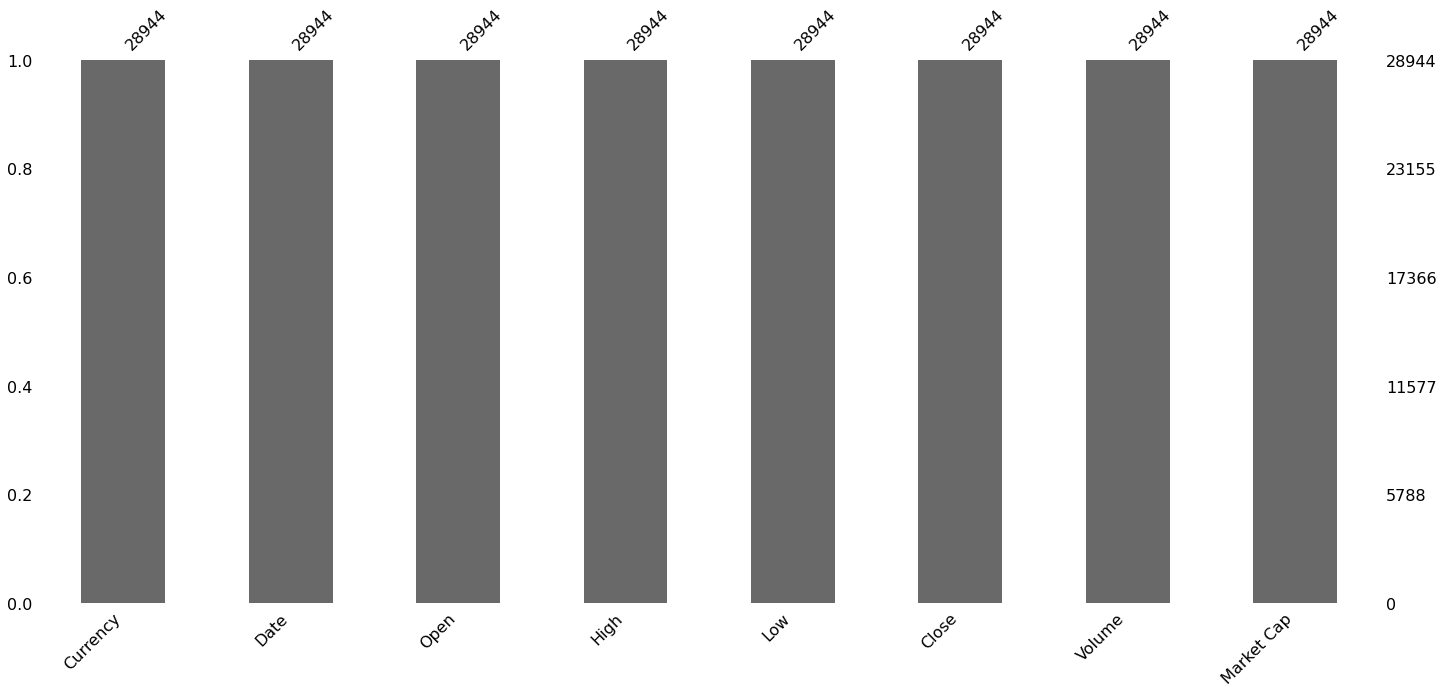

In [11]:
msno.bar(dfraw) # show matrix with missing values, if any

In [12]:
dfraw.isnull().sum() #show sum of missing values on each category (column)

Currency      0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [13]:
dfraw.drop_duplicates() #drops all duplicate rows in the dataframe

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,2019-12-04,1.29,1.32,1.25,1.25,46048752.0,824588509.0
1,tezos,2019-12-03,1.24,1.32,1.21,1.29,41462224.0,853213342.0
2,tezos,2019-12-02,1.25,1.26,1.20,1.24,27574097.0,817872179.0
3,tezos,2019-12-01,1.33,1.34,1.25,1.25,24127567.0,828296390.0
4,tezos,2019-11-30,1.31,1.37,1.31,1.33,28706667.0,879181680.0
...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,2013-05-02,3.78,4.04,3.01,3.37,0.0,58287979.0
28940,bitcoin-sv,2013-05-01,4.29,4.36,3.52,3.80,0.0,65604596.0
28941,bitcoin-sv,2013-04-30,4.40,4.57,4.17,4.30,0.0,74020918.0
28942,bitcoin-sv,2013-04-29,4.37,4.57,4.23,4.38,0.0,75388964.0


From the exploration above it is possible to conclude that:
* The datasource has no missing values and no duplicated ones;
* The original datatypes were incongruent with the data exploration steps to be taken following hence, a datatypes conversion was necessary (using pandas);
* There are 12 different types of currencies on the dataframe.

Now that the basic exploration (research phase) has been done, the dataframe is ready to be visualised. To generate the requested plots, pivot tables were assembled with the specific variables necessary for each plot and subplots with partial results. All detailed explanations are included in this Notebook under the respective sections.

## Part II
###  Young Adults visualisations (17-35 age group)
## Visualisations

### a) Generate a plot that details change in the “High” value for all the Currencies over time
For this plot, an extra column calculating the "change in `High`" (difference between `High` value from one day to the following) was added to the dataset. Then, a line graph was plotted illustrating the the changes in `High` from April 2013 to December 2019.


In [14]:
df_high = dfraw #copy raw dataframe and assign name `df_high`

In [15]:
df_high['Change in High'] = dfraw['High'].diff(1) #calculate the difference between 'High' daily
df_high.dropna() #drop NA values on the table (`pivot` does not plot if df has 'NA')

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,Change in High
1,tezos,2019-12-03,1.24,1.32,1.21,1.29,41462224.0,853213342.0,0.00
2,tezos,2019-12-02,1.25,1.26,1.20,1.24,27574097.0,817872179.0,-0.06
3,tezos,2019-12-01,1.33,1.34,1.25,1.25,24127567.0,828296390.0,0.08
4,tezos,2019-11-30,1.31,1.37,1.31,1.33,28706667.0,879181680.0,0.03
5,tezos,2019-11-29,1.28,1.34,1.28,1.31,32270224.0,867085098.0,-0.03
...,...,...,...,...,...,...,...,...,...
28939,bitcoin-sv,2013-05-02,3.78,4.04,3.01,3.37,0.0,58287979.0,0.59
28940,bitcoin-sv,2013-05-01,4.29,4.36,3.52,3.80,0.0,65604596.0,0.32
28941,bitcoin-sv,2013-04-30,4.40,4.57,4.17,4.30,0.0,74020918.0,0.21
28942,bitcoin-sv,2013-04-29,4.37,4.57,4.23,4.38,0.0,75388964.0,0.00


In [16]:
df_plot = df_high.pivot_table(index='Date', columns='Currency', values='High') #pivot table for plot
df_plot #show new dataframe

Currency,binance-coin,bitcoin,bitcoin-cash,bitcoin-sv,cardano,eos,ethereum,litecoin,stellar,tether,tezos,xrp
Date,,,,,,,,,,,,
2013-04-28,4.40,135.98,135.98,4.40,4.400000,4.40,135.98,4.40,4.400000,135.98,4.40,135.980000
2013-04-29,4.57,147.49,147.49,4.57,4.570000,4.57,147.49,4.57,4.570000,147.49,4.57,147.490000
2013-04-30,4.57,146.93,146.93,4.57,4.570000,4.57,146.93,4.57,4.570000,146.93,4.57,146.930000
2013-05-01,4.36,139.89,139.89,4.36,4.360000,4.36,139.89,4.36,4.360000,139.89,4.36,139.890000
2013-05-02,4.04,125.60,125.60,4.04,4.040000,4.04,125.60,4.04,4.040000,125.60,4.04,125.600000
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-30,16.37,7836.10,226.76,110.60,0.042268,2.83,156.69,49.28,0.060415,1.02,1.37,0.233615
2019-12-01,15.74,7571.62,219.26,107.70,0.040426,2.84,152.49,48.30,0.059877,1.02,1.34,0.226525
2019-12-02,15.71,7474.82,218.92,104.89,0.039769,2.80,152.12,47.81,0.058214,1.02,1.26,0.227203


Text(0.5, 1.0, 'Change in High for Cryptocurrencies between 2013 and 2019')

<Figure size 432x288 with 0 Axes>

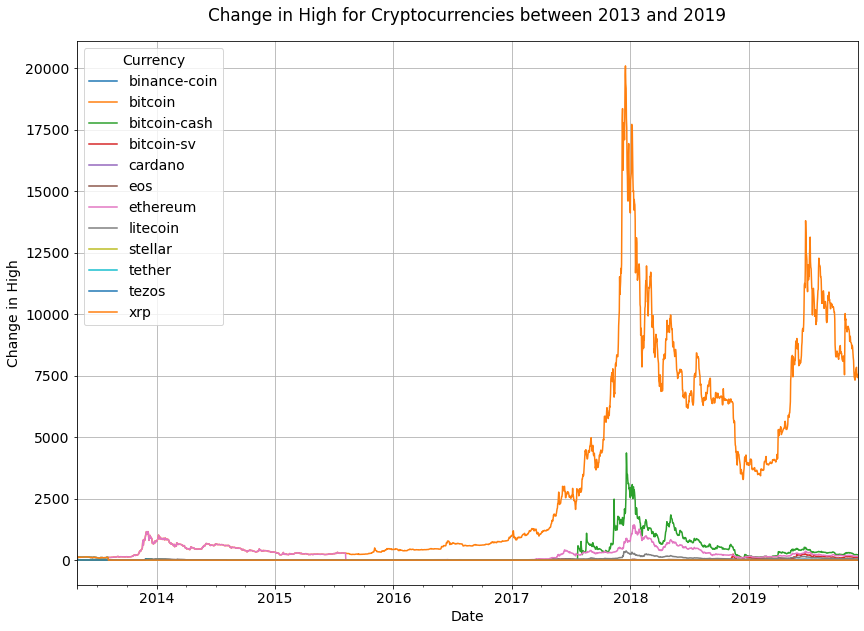

In [31]:
#plot change in high for all crypto in the df between 2013 and 2019 (using pandas)
plt.figure()
plt.rcParams.update({'font.size': 14}) # must be set in top

top3 = df_plot.plot(figsize=(14, 10), 
#               title='Change in High for Cryptocurrencies between 2013 and 2019',
              ylabel='Change in High',
              fontsize=14,
              grid=True,
             )
top3.set_title('Change in High for Cryptocurrencies between 2013 and 2019', pad=20)



#     ax2 = ax1.twinx()
#     ax3 = df_plot.plot(x='wind_direct',y=counts_columns,figsize=(30,18),kind='bar',legend=True, ax=ax2, fontsize=16)
#     ax3.set_title(title,pad=20, fontdict={'fontsize':24})
#     ax3.set_ylabel('counts',fontdict={'fontsize':24})
#     #ax3.set_fontsize(24)
#     plt.rcParams.update({'font.size': 22})
#     ax3.legend(loc=1,fontsize=20);

### Conclusion Plot [(a)](#a\)-Generate-a-plot-that-details-change-in-the-“High”-value-for-all-the-Currencies-over-time)
The plot above illustrates the change in values where the cryptocurrency market is High from April 2013 to Dec 2019. It is possible to observe that Bitcoin was the cryptocurrency with the biggest change in values, followed by Bitcoin-Cash and Ethereum.

At the end of 2017, Bitcoin had a sharp increase on market evaluation which quickly dropped on the first trimester of the following year (2018). The 'highs' continue to decrease until the start of 2019 qhen the coin increased its value again. According to the plot it is also safe to affirm that the other coins illustrated have barely had any variations if compared to the price fluctuation of Bitcoins.

### b) Plot a graph depicting the “Volume” by Currency between 2016 and 2019 for the top 3 Currencies


To determine the `top 3 currencies` the sum of the Market Cap was (arbitrarily) used on the dataframe named `df_top`.

Considering the `Market Cap` is determined by the **share price** multiplied by the **shares number** outstanding, the more shares (and more expensive) the 'higher' the coin on the rank of `top score` cryptocurrencies.

To follow, all records from 2016 were selected (this dataset only has entries until Dec 2019). All rows that contain data from currencies which are not the top 3 were dropped and a pivot table was made with the remaining data. Finally, a timeseries plot was composed by showing the volume on the market for each of the top 3 currencies from 2016 to 2019.

In [18]:
df_top = dfraw.groupby('Currency').sum() # outputs the data grouped by 'Currency' type
df_top

,Open,High,Low,Close,Volume,Market Cap,Change in High
Currency,,,,,,,
binance-coin,2.160040e+04,2.248373e+04,2.067013e+04,2.164476e+04,1.357148e+11,1.883102e+12,1.776357e-15
bitcoin,7.285767e+06,7.487124e+06,7.066728e+06,7.292679e+06,8.681168e+12,1.239761e+14,1.315800e+02
bitcoin-cash,5.622291e+05,5.941293e+05,5.297038e+05,5.616461e+05,8.736489e+11,9.613086e+12,-8.952838e-13
bitcoin-sv,5.666627e+04,5.948078e+04,5.393788e+04,5.670755e+04,1.675303e+11,1.545996e+12,-5.329071e-15
cardano,4.731628e+03,4.998188e+03,4.445539e+03,4.735288e+03,9.659496e+10,2.957233e+12,-1.315800e+02
eos,1.492398e+04,1.562316e+04,1.418567e+04,1.495708e+04,1.025573e+12,4.199732e+12,1.776357e-15
ethereum,6.352246e+05,6.561174e+05,6.116400e+05,6.354043e+05,3.447802e+12,3.622732e+13,1.315800e+02
litecoin,8.875216e+04,9.240599e+04,8.474572e+04,8.876869e+04,1.230496e+12,4.904134e+12,2.309264e-14
stellar,4.766595e+03,5.034124e+03,4.479912e+03,4.770292e+03,1.330261e+11,2.835309e+12,-1.315800e+02


In [19]:
df_top = df_top.drop(columns = ['Open', 'High', 'Low', 'Close']) #drop non-used columns

In [20]:
df_top = df_top.sort_values('Market Cap', ascending=False) #determine top currencies
df_top #output table ordered by top currencies

,Volume,Market Cap,Change in High
Currency,,,
bitcoin,8.681168e+12,1.239761e+14,1.315800e+02
ethereum,3.447802e+12,3.622732e+13,1.315800e+02
xrp,8.413188e+11,1.733670e+13,-3.552714e-13
bitcoin-cash,8.736489e+11,9.613086e+12,-8.952838e-13
litecoin,1.230496e+12,4.904134e+12,2.309264e-14
eos,1.025573e+12,4.199732e+12,1.776357e-15
cardano,9.659496e+10,2.957233e+12,-1.315800e+02
stellar,1.330261e+11,2.835309e+12,-1.315800e+02
tether,6.898083e+12,2.240021e+12,-4.405365e-13


In [21]:
#select rows with dates after '2016-01-01' (latest record is '2019-12-04')
df_date = dfraw[dfraw['Date'] >= '2016-01-01']
df_date

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,Change in High
0,tezos,2019-12-04,1.29,1.32,1.25,1.25,46048752.0,824588509.0,NaN
1,tezos,2019-12-03,1.24,1.32,1.21,1.29,41462224.0,853213342.0,0.00
2,tezos,2019-12-02,1.25,1.26,1.20,1.24,27574097.0,817872179.0,-0.06
3,tezos,2019-12-01,1.33,1.34,1.25,1.25,24127567.0,828296390.0,0.08
4,tezos,2019-11-30,1.31,1.37,1.31,1.33,28706667.0,879181680.0,0.03
...,...,...,...,...,...,...,...,...,...
27961,bitcoin-sv,2016-01-05,3.49,3.51,3.45,3.47,2104650.0,152390643.0,0.04
27962,bitcoin-sv,2016-01-04,3.48,3.51,3.48,3.50,3309740.0,153467942.0,0.00
27963,bitcoin-sv,2016-01-03,3.50,3.51,3.45,3.48,2406150.0,152873557.0,0.00
27964,bitcoin-sv,2016-01-02,3.52,3.53,3.49,3.50,3020260.0,153658445.0,0.02


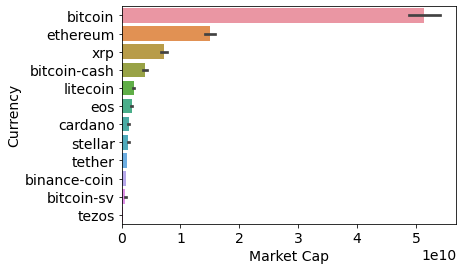

In [35]:
# depict of top currencies according to their Market Cap (arbitrarily chosen, based on Market Cap)
ax = sns.barplot(x='Market Cap', y='Currency',
                 data=dfraw,
                 order=['bitcoin', 'ethereum', 'xrp', 'bitcoin-cash', 'litecoin', 'eos', 'cardano',
                        'stellar', 'tether', 'binance-coin', 'bitcoin-sv', 'tezos'])

Based on the plot above (and the sorted table on the previous cell `df_top`) it is possible to conclude that the top 3 cryptocurrencies are:

1. Bitcoin;
2. Ethereum and
3. XRP.

In [23]:
# selects rows where 'Currency' is equal to 'bitcoin', 'ethereum' and 'xrp' (the top 3) bewtween the 2016 and 2019 period
df_date = df_date.loc[df_date['Currency'].isin(['bitcoin','ethereum', 'xrp'])]
df_date #outputs the new dataframe `df_date`

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,Change in High
7236,bitcoin,2019-12-04,7320.130000,7539.780000,7170.920000,7252.030000,2.166424e+10,1.311431e+11,7535.380000
7237,bitcoin,2019-12-03,7323.980000,7418.860000,7229.360000,7320.150000,1.479749e+10,1.323599e+11,-120.920000
7238,bitcoin,2019-12-02,7424.040000,7474.820000,7233.400000,7321.990000,1.708204e+10,1.323790e+11,55.960000
7239,bitcoin,2019-12-01,7571.620000,7571.620000,7291.340000,7424.290000,1.872071e+10,1.342151e+11,96.800000
7240,bitcoin,2019-11-30,7764.060000,7836.100000,7515.850000,7569.630000,1.715819e+10,1.368294e+11,264.480000
...,...,...,...,...,...,...,...,...,...
23137,ethereum,2016-01-05,0.953147,0.970597,0.946543,0.950176,2.198330e+05,7.224097e+07,0.009938
23138,ethereum,2016-01-04,0.972045,0.976438,0.929835,0.954480,3.462450e+05,7.254371e+07,0.005841
23139,ethereum,2016-01-03,0.938430,0.991362,0.934313,0.971905,4.076320e+05,7.384329e+07,0.014924
23140,ethereum,2016-01-02,0.947401,0.969637,0.936560,0.937124,2.555040e+05,7.117666e+07,-0.021725


In [24]:
# create a pivot table with only the columns 'Date', 'Currency' and 'Volume'
df_pivot = df_date.pivot(index='Date', columns='Currency', values='Volume')
df_pivot.head() #since `pivot` does not overwrite the original df, it is necessary to create a new one.

Currency,bitcoin,ethereum,xrp
Date,,,
2016-01-01,36278900.0,206062.0,211767.0
2016-01-02,30096600.0,255504.0,278539.0
2016-01-03,39633800.0,407632.0,291723.0
2016-01-04,38477500.0,346245.0,310820.0
2016-01-05,34522600.0,219833.0,381554.0


<AxesSubplot:title={'center':'Volume of top 3 Currencies between 2016 and 2019'}, xlabel='Date', ylabel='Volume'>

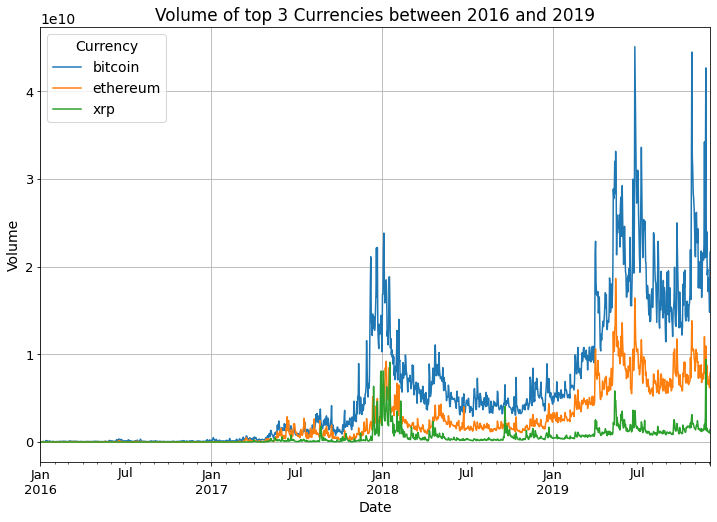

In [25]:
#plot crypto volume by top currencies between 2016 and 2019
df_pivot.plot(figsize=(12, 8), 
              title='Volume of top 3 Currencies between 2016 and 2019',
              ylabel='Volume',
              fontsize=13,
              grid=True
             )

### Conclusion Plot [(b)](#b\)-Plot-a-graph-depicting-the-“Volume”-by-Currency-between-2016-and-2019-for-the-top-3-Currencies)

The plot above illustrates the existing volume of cryptocurrencies with the highest cummulative Market Cap from January 1st 2016 to Dec 4th 2019. Regarding trends, it is possible to observe that very little currency was generated up until May 2016, when a small increase can be noticed. A sharp twofold increase then can be observed in January 2018 on Bitcoin, the coin which dominates the market in volume since August 2017. The overall sharpest increases on Bitcoin happened in July 2019, when the coin increased almost twenty times its volume if comparing with the same period two years beforehand (2018).

A line graph was chosen for this visualisation since it is possible to clearly visualise the difference between the currency's volumes overtime. The grid is meant to serve as aid for the reader and the colour-scheme is vivid in order to sharply distinguish the lines.

## Part III
### Viz for the 60+ age group (a.k.a. the Seniours)

This part of the assignment contains data visualisations for the Seniours group. Plot (a) was copied from the previous part (above) and adapted to the age group. In addition, Plot (b) was built as interactive to facilitate the visualisation of the data hence, the assilation of information.

### a) Plot the detailed change in the “High” value for all the Currencies over time

For this plot, the same skeleton as the previous plot was used, and specifics such as font size and colours were changed in order to adjust the plot to the audience target.


Text(0.5, 1.0, 'Change in High for Cryptocurrencies between 2013 and 2019')

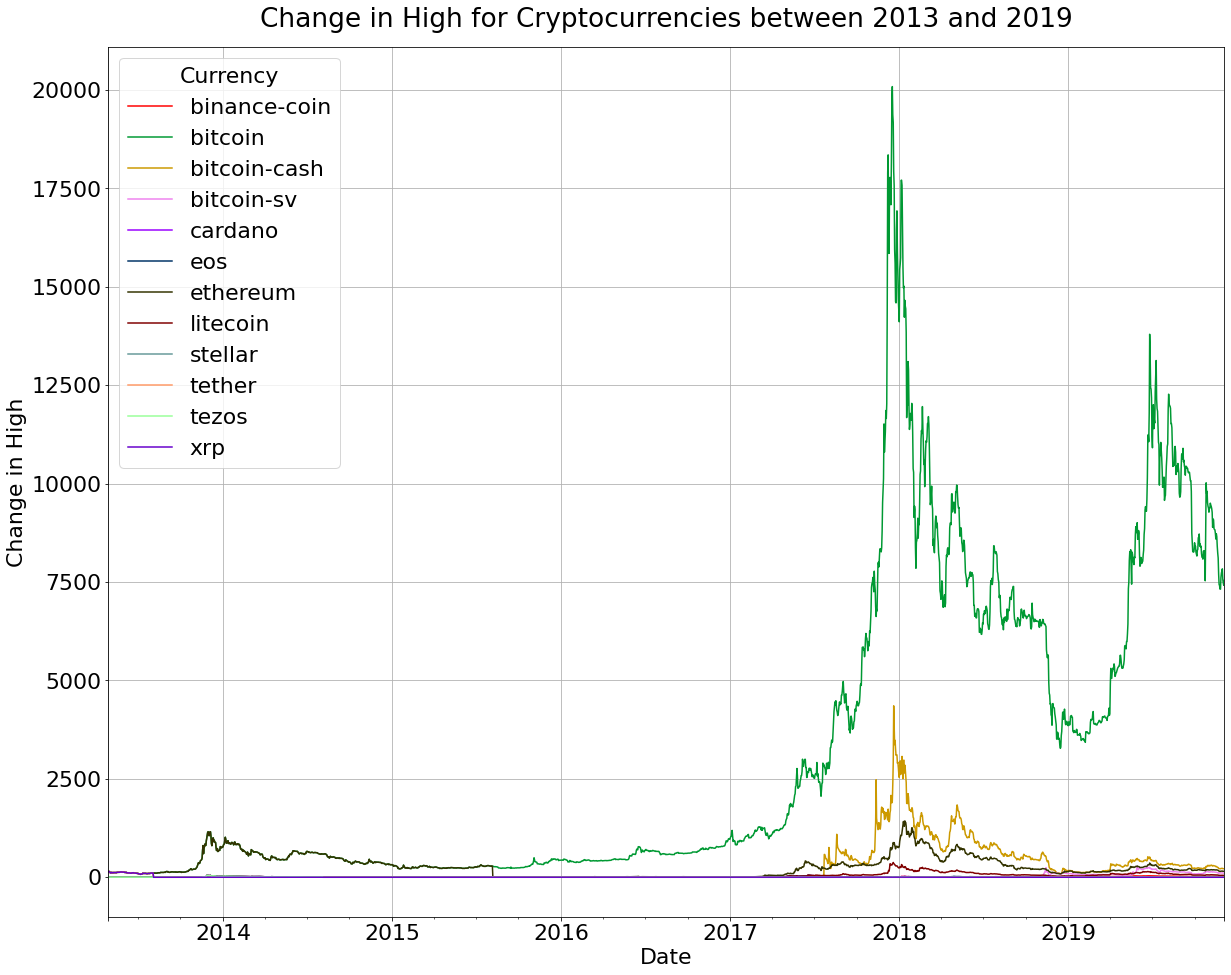

In [26]:
# update default parameters for fonts using pandas/plt
plt.rcParams.update({'font.size': 22}) # must be set in top

#plot change in high for all crypto in the df between 2013 and 2019 (using pandas)
top3 = df_plot.plot(figsize=(20, 16), 
              ylabel='Change in High',
              fontsize=22,
              grid=True,
              color=('#ff0000', '#009933','#cc9900', 'violet',
                    '#9900ff', '#003366', '#333300', '#800000',
                    '#669999', '#ff9966', '#99ff99', '#6600cc'),
             )
top3.set_title('Change in High for Cryptocurrencies between 2013 and 2019', pad=20)

### Conclusion Plot [(a)](#a\)-Plot-the-detailed-change-in-the-“High”-value-for-all-the-Currencies-over-time)
It is possible to infer from the graph above that Bitcoin is the cryptocurrency with the most significant changes in High from all listed currencies. By the end of 2017 (and start of 2018) Bitcoin-cash was the second coin with the largest variation of high values among the ones on the dataset, followed by Ethereum.

### b) Plot a graph depicting the “Volume” by Currency between 2016 and 2019 for the top 3 Currencies.
## Note to user - Instructions:
This is an interactive plot. To better interact with the plot follow the guidelines below:
* **Zoom**
    - **Using a mouse**: (with the cursor in the plot) Zoom In > ⬆️ forward scroll  **|**  Zoom out > ⬇️ backwards scroll
    - **Using a laptop's mousepad**: same as above but with two fingers on the machine's touchpad.
* **Drag the plot** to move it within the grid;
* **Hovering** (slide the mouse pointer through the graph) will show detailed information about the datapoints.
</font-size>

In [27]:
# disables Altair's default of tables with maximum of 5000 rows
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

> The following plot is an interactive one. Read [here](#Note-to-user---Instructions:) for instructions on how to navigate it.

In [42]:
# plot an interactive graph depicting volume by top 3 currencies between 2016 and 2019
plot = alt.Chart(df_date).mark_line(size=2).encode(
    x='Date',
    y='Volume',
    strokeDash='Currency',
    tooltip=['Currency', 'Date', 'High', 'Low', 'Volume'],
    color=alt.Color('Currency', scale=alt.Scale(scheme='dark2')),
).properties(
    width=700,
    height=500,
    title='Volume by top 3 Currencies between 2016 and 2019'
).interactive()


plot = plot.configure_title( #configure title
        fontSize=20,
    )

plot = plot.configure_axis( #increase font size on axis
        labelFontSize=16,
        )

plot = plot.configure_legend( #change configurations on legend box
        strokeColor='gray',
        fillColor='#EEEEEE',
        padding=10,
        cornerRadius=10,
        orient='top-left',
    )

plot = plot.configure_view( #increases weight of the lines on the graph
    strokeWidth=4,
)

plot

alt.Chart(...)

According to the interactive graph above, it is possible to observe that Bitcoin has the highest Volume of Cryptocurrency in the market. Followed by Ethereum and Ripple (XRP). From May 2019, all currencies illustrated above had a major increase on their volumes.

> The colours (contrasting although with reduced brightness), increased font-size and interactiveness features were adopted in order to make this visualisation more suitable for the audience of 60+ yeard old.

## References

Moffitt, C., 2018. Overview Of Pandas Data Types - Practical Business Python. [online] Pbpython.com. Available at: <https://pbpython.com/pandas_dtypes.html> [Accessed 22 December 2020].

Altair's documentation: https://altair-viz.github.io/user_guide/generated/toplevel/altair.Chart.html?highlight=scheme | https://vega.github.io/vega/docs/schemes/

Matplotlib's documentation: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html?highlight=plot%20plot#module-matplotlib.pyplot